<a href="https://colab.research.google.com/github/24062001/ans/blob/main/BECOD449_AARTI_SAWANT_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
4) Perform classification using deep learning convolution network. Compare and comment on result by using different Kernel size and activation function.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
def create_model(kernel_size, activation):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (kernel_size, kernel_size), activation=activation, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (kernel_size, kernel_size), activation=activation))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (kernel_size, kernel_size), activation=activation))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation))
    model.add(layers.Dense(10))
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model


In [ ]:
kernel_sizes = [3, 5]
activations = ['relu', 'sigmoid', 'tanh']
results = []

for kernel_size in kernel_sizes:
    for activation in activations:
        model = create_model(kernel_size, activation)
        history = model.fit(train_images, train_labels, epochs=6, validation_data=(test_images, test_labels))
        test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
        results.append((kernel_size, activation, test_acc))
        print(f"Kernel size: {kernel_size}, Activation function: {activation}, Test accuracy: {test_acc}")


Epoch 1/6
1563/1563 [==============================] - 49s 31ms/step - loss: 1.5247 - accuracy: 0.4441 - val_loss: 1.2297 - val_accuracy: 0.5553
Epoch 2/6
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1750 - accuracy: 0.5815 - val_loss: 1.1559 - val_accuracy: 0.5927
Epoch 3/6
1563/1563 [==============================] - 47s 30ms/step - loss: 1.0352 - accuracy: 0.6367 - val_loss: 1.0569 - val_accuracy: 0.6215
Epoch 4/6
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9412 - accuracy: 0.6698 - val_loss: 0.9695 - val_accuracy: 0.6600
Epoch 5/6
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8696 - accuracy: 0.6960 - val_loss: 0.9490 - val_accuracy: 0.6653
Epoch 6/6
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8126 - accuracy: 0.7151 - val_loss: 0.9353 - val_accuracy: 0.6785
313/313 - 2s - loss: 0.9353 - accuracy: 0.6785 - 2s/epoch - 8ms/step
Kernel size: 3, Activation function: relu, Test accuracy: 0.6

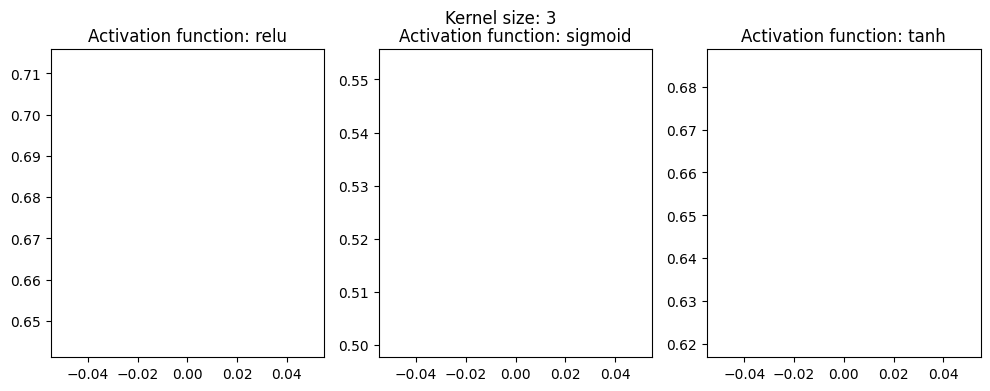

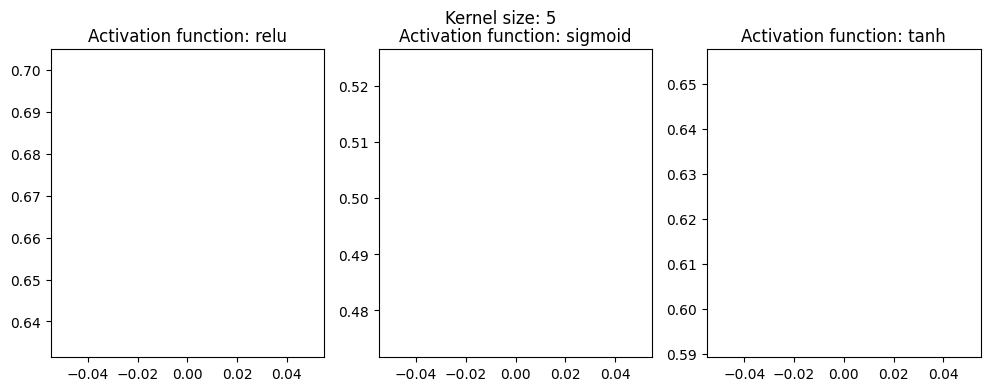

In [ ]:
for kernel_size in kernel_sizes:
    plt.figure(figsize=(12, 4))
    plt.suptitle(f"Kernel size: {kernel_size}")
    for i, activation in enumerate(activations):
        plt.subplot(1, 3, i+1)
        acc = [result[2] for result in results if result[0] == kernel_size and result[1] == activation]
        plt.plot(acc)
        plt.title(f"Activation function: {activation}")
